# **LOAN PREDICTION**

In [1]:
# import libraries
import numpy as np
import pandas as pd

# Load Dataset
train = pd.read_csv("/home/yash/project/Analytics_Vidya/Hack_A_Thon/loan-prediciton/Dataset/train_ctrUa4K.csv")
test = pd.read_csv("/home/yash/project/Analytics_Vidya/Hack_A_Thon/loan-prediciton/Dataset/test_lAUu6dG.csv")

#### For Train DataSet

In [2]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
test.shape

(367, 12)

In [4]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
# shape of train dataset
train.shape

(614, 13)

In [6]:
# describe train dataset
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# train dataset infomation 
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Columns present in train dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# looking for missing values for each feature
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train['Gender'].isnull().sum()

13

### Exploratory Data Analysis

In [11]:
# import visulization library
import matplotlib.pyplot as plt
import seaborn as sns

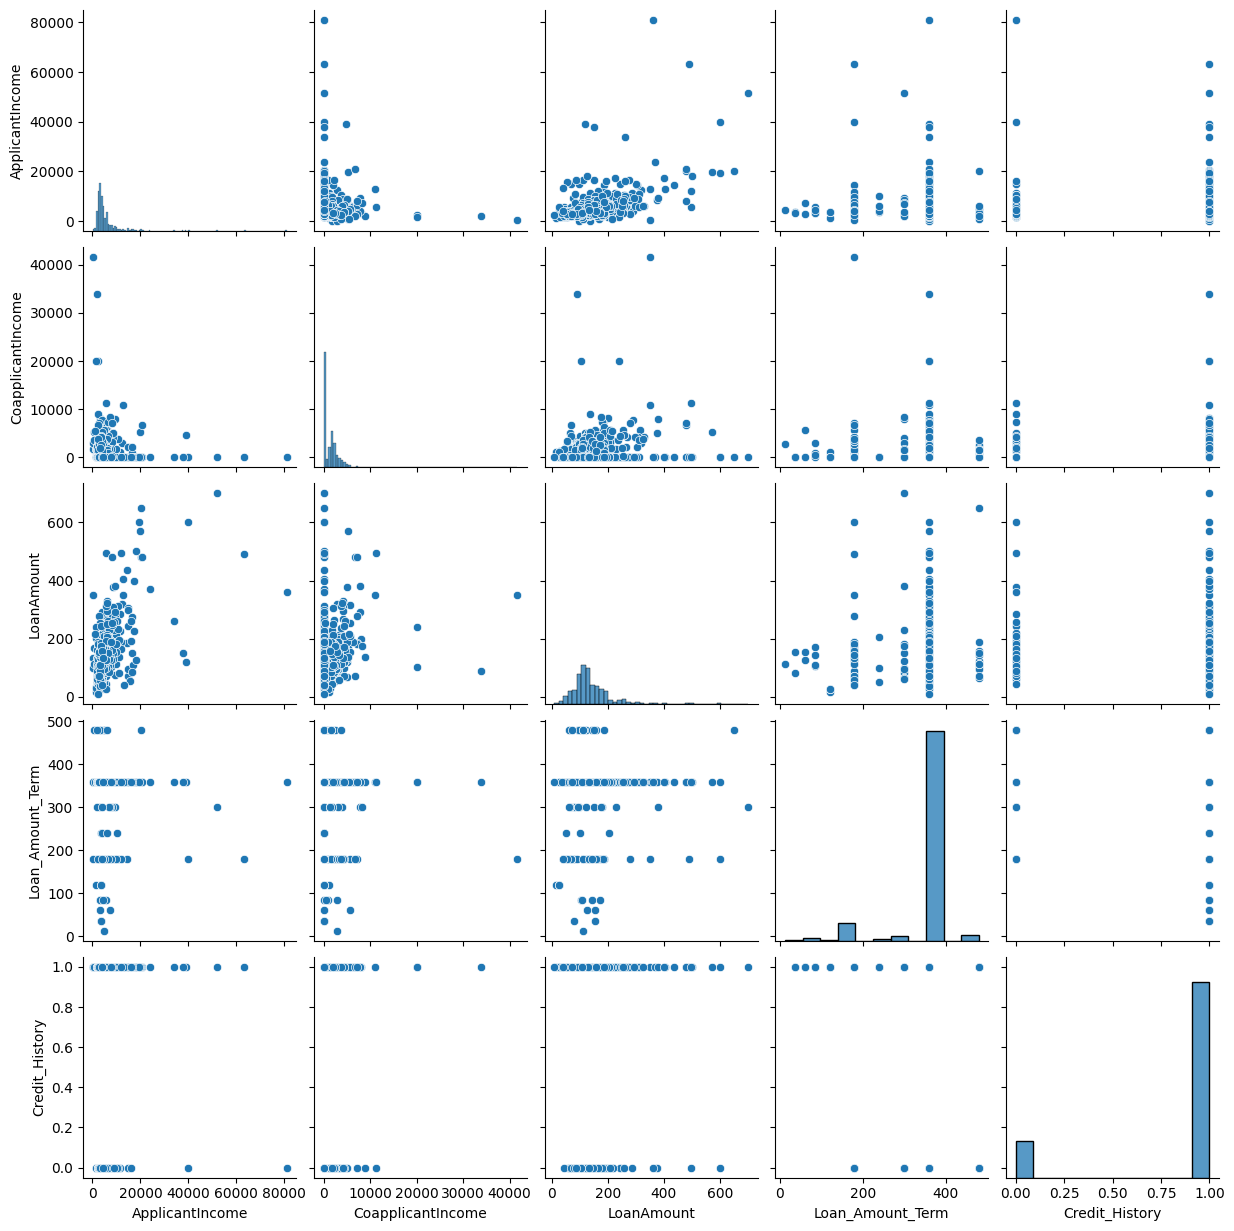

In [12]:
sns.pairplot(train)

In [13]:
from sweetviz import analyze

my_report = analyze(train)

/home/yash/project/Analytics_Vidya/Hack_A_Thon/loan-prediciton/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yash/project/Analytics_Vidya/Hack_A_Thon/loan-prediciton/venv/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/yash/project/Analytics_Vidya/Hack_A_Thon/loan-prediciton/venv/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: Loan_ID                             |▋         | [  7

In [15]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
# Data preprocessing
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train = train[0:11]
one = enc.fit(X_train)

In [25]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
one.categories_

[array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
        'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
        'LP001024'], dtype=object),
 array(['Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([ 2333,  2583,  3000,  3036,  3200,  4006,  4583,  5417,  5849,
         6000, 12841]),
 array([    0.,   700.,  1508.,  1516.,  1526.,  2358.,  2504.,  4196.,
        10968.]),
 array([ 66.,  70.,  95., 120., 128., 141., 158., 168., 267., 349.,  nan]),
 array([360.]),
 array([0., 1.]),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [30]:
# Data Preprocessing
train['Loan_Status'] = train['Loan_Status'].map({"Y":1, "N":0})

In [31]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [34]:
xtr = train.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
xte = test.drop(['Loan_ID','Gender'],axis=1)

In [35]:
ytr = train[['Loan_Status']]

In [37]:
cat_cols = [col for col in xtr.columns if xtr.dtypes[col]=='object']
cat_cols

['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [38]:
num_cols = [col for col in xtr.columns if xtr.dtypes[col] != 'object']
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
xtr_cat = xtr[cat_cols]
xtr_num = xtr[num_cols]
xte_cat = xte[cat_cols]
xte_num = xte[num_cols]

In [40]:
# Null value imputation
from sklearn.impute import SimpleImputer
cat_impu = SimpleImputer(strategy='most_frequent')
num_impu = SimpleImputer(strategy='median')
xtr_cat = pd.DataFrame(cat_impu.fit_transform(xtr_cat),columns=cat_cols)
xte_cat = pd.DataFrame(cat_impu.fit_transform(xte_cat),columns=cat_cols)
xtr_num = pd.DataFrame(num_impu.fit_transform(xtr_num),columns=num_cols)
xte_num = pd.DataFrame(num_impu.fit_transform(xte_num),columns=num_cols)

In [41]:
# Function to convert all object columns to categorical
xtr_cat[cat_cols] = xtr_cat[cat_cols].astype("category")
xte_cat[cat_cols] = xte_cat[cat_cols].astype("category")

In [42]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [43]:
for col in cat_cols:
    xtr_cat[col] = encoder.fit_transform(xtr_cat[col])
    xte_cat[col] = encoder.fit_transform(xte_cat[col])

In [44]:
xtr_cat.head()

,Married,Dependents,Education,Self_Employed,Property_Area
0,0,0,0,0,2
1,1,1,0,0,0
2,1,0,0,1,2
3,1,0,1,0,2
4,0,0,0,0,2


In [45]:
train.shape

(614, 13)

In [46]:
xtr=pd.concat([xtr_num,xtr_cat],axis=1)

In [47]:
xte = pd.concat([xte_num,xte_cat],axis=1)

In [48]:
columnsxtr = xtr.columns
columnsxtr

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()